<a href="https://colab.research.google.com/github/annaberezov/akfie927/blob/main/Berezovski_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Four
##Anna-Maria Berezovski
##CSC 687
##February 21, 2022


## Import and Prepare the Data

In [1]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# We have two files to work with, a test file and a train file. We will import them
# both here into two data frames
df_test = pd.read_csv('Test.csv')
df_train = pd.read_csv('Train.csv')

To look at the correlation between attributes and the target variable, we will use the train dataset since it is larger

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


We will now remove any duplicates if there are any

In [3]:
df_train = df_train.drop_duplicates()

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 756.4+ KB


We will now only include relevant or useful columns

In [4]:
df_train = df_train[["Age", "Gender", "Ever_Married", "Graduated", "Spending_Score", "Work_Experience", "Family_Size", "Segmentation"]]


In [5]:
df_train

,Age,Gender,Ever_Married,Graduated,Spending_Score,Work_Experience,Family_Size,Segmentation
0,22,Male,No,No,Low,1.0,4.0,D
1,38,Female,Yes,Yes,Average,NaN,3.0,A
2,67,Female,Yes,Yes,Low,1.0,1.0,B
3,67,Male,Yes,Yes,High,0.0,2.0,B
4,40,Female,Yes,Yes,High,NaN,6.0,A
...,...,...,...,...,...,...,...,...
8063,22,Male,No,No,Low,0.0,7.0,D
8064,35,Male,No,No,Low,3.0,4.0,D
8065,33,Female,No,Yes,Low,1.0,1.0,D
8066,27,Female,No,Yes,Low,1.0,4.0,B


## Correlation Values

In [6]:
corr_matrix = df_train.corr()

corr_matrix

,Age,Work_Experience,Family_Size
Age,1.000000,-0.190789,-0.280517
Work_Experience,-0.190789,1.000000,-0.063234
Family_Size,-0.280517,-0.063234,1.000000


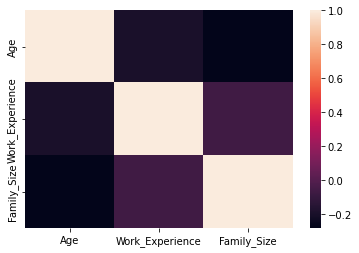

In [7]:
sns.heatmap(corr_matrix)

Since we can only see the correlation using the matrix with numeric variables, we will graph the rest of the relationships

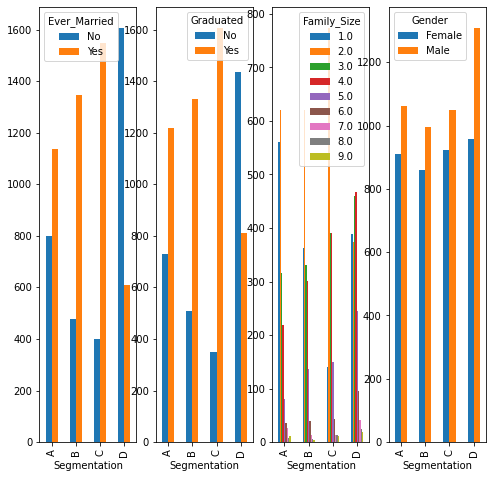

In [8]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1, 4)

ct2 = pd.crosstab(df_train['Segmentation'], df_train['Ever_Married'])
ct2.plot.bar(ax = axes[0],figsize=(8,8))

ct3 = pd.crosstab(df_train['Segmentation'], df_train['Graduated'])
ct3.plot.bar(ax = axes[1],figsize=(8,8))

ct4 = pd.crosstab(df_train['Segmentation'], df_train['Family_Size'])
ct4.plot.bar(ax = axes[2],figsize=(8,8))

ct5 = pd.crosstab(df_train['Segmentation'], df_train['Gender'])
ct5.plot.bar(ax = axes[3],figsize=(8,8))

## Pipelines

### Imputation

We will now use imputation to handle missing values in the data

In [9]:
df_train.isnull().sum()

Age                  0
Gender               0
Ever_Married       140
Graduated           78
Spending_Score       0
Work_Experience    829
Family_Size        335
Segmentation         0
dtype: int64

We can see that the data set has null values for the variables Ever_Married, Graduated, Work_Experience, and Family_Size
In order to make the correct pipelines, we need to see the types for the data columns

In [10]:
df_train.dtypes

Age                  int64
Gender              object
Ever_Married        object
Graduated           object
Spending_Score      object
Work_Experience    float64
Family_Size        float64
Segmentation        object
dtype: object

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler

########## First create a pipeline for the categoric attributes

cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'Segmentation']

cat_transformer = Pipeline(steps=[
    # strategies are mean, median, most_frequent, etc.
    ('imputer', SimpleImputer(strategy='most_frequent')),

    # In ordinal encoding, each unique category value is assigned an integer value.
    ('ordinal', OrdinalEncoder())
])

########## Second create a pipeline for the numeric attributes

num_cols = ['Age', 'Work_Experience', 'Family_Size']

num_transformer = Pipeline(steps=[
    # Number of neighboring samples to use for K-nearest neighor imputation
    ('imputer', KNNImputer(n_neighbors=5)),

    # StandardScaler makes mean = 0 and scales the data to unit variance 
    ('scaler', StandardScaler())
])

########## Finally, apply column transformations

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])


### Classification Pipelines

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC

num_folds = 2

#X = df_train.drop('Segmentation',1)
X = df_train
y = df_train['Segmentation']

########## A logistic regression model
lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

lr_score = cross_val_score(lr_clf, X, y, cv=num_folds, scoring="accuracy").mean()

########## A decicion tree with gini
gini_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini'))])

gini_dt_score = cross_val_score(gini_dt_clf, X, y, cv=num_folds, scoring="accuracy").mean()


########## A decicion tree with entropy
entropy_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy'))])

entropy_dt_score = cross_val_score(entropy_dt_clf, X, y, cv=num_folds, scoring="accuracy").mean()


########## A random forest
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

rf_clf_score = cross_val_score(rf_clf, X, y, cv=num_folds, scoring="accuracy").mean()


########## An RBF kernel classifier
rbf_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='rbf'))])

rbf_svc_clf_score = cross_val_score(rbf_svc_clf, X, y, cv=num_folds, scoring="accuracy").mean()


########## A poly kernel classifier
poly_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='poly'))])

poly_svc_clf_score = cross_val_score(poly_svc_clf, X, y, cv=num_folds, scoring="accuracy").mean()


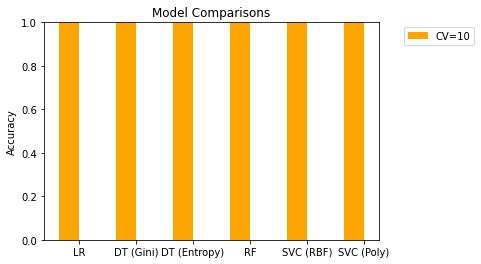

In [13]:
import numpy as np
# Summarize the findings for all models

labels = ['LR', 'DT (Gini)', 'DT (Entropy)', 'RF', 'SVC (RBF)', 'SVC (Poly)']
training_scores = [lr_score, gini_dt_score, entropy_dt_score, rf_clf_score, rbf_svc_clf_score, poly_svc_clf_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='CV=10', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

## Knowledge Tree

|--- Segmentation <= 1.50
|   |--- Segmentation <= 0.50
|   |   |--- class: A
|   |--- Segmentation >  0.50
|   |   |--- class: B
|--- Segmentation >  1.50
|   |--- Segmentation <= 2.50
|   |   |--- class: C
|   |--- Segmentation >  2.50
|   |   |--- class: D



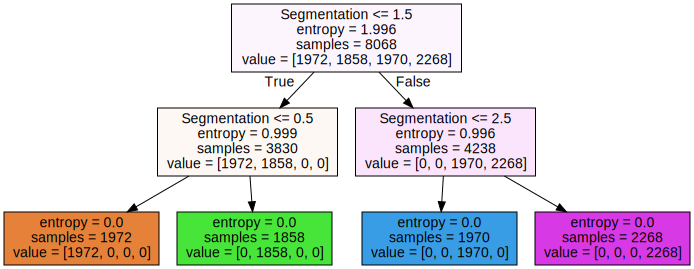

In [18]:
# Convert the decision tree model to text and graph

from matplotlib import pyplot
from sklearn.tree import export_text, export_graphviz
import graphviz

# we need to refit the DT model that is part of a composite pipe before exporting it as text
entropy_dt_clf['classifier'].fit(preprocessor.fit_transform(X), y)


# display the induced decision tree as a series of logical rules
text_representation = export_text(entropy_dt_clf['classifier'], feature_names=['Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation'], max_depth=2)
print(text_representation)


# draw the induced decision tree
dot_data = export_graphviz(entropy_dt_clf['classifier'], max_depth=2,feature_names=['Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation'],filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

## Hyperparameter Optimization

In [ ]:
# Use GridSearchCV to find optimum hyperparameter values for the DT model


# create a dictionary of all values we want to test
param_grid1 = { 'criterion':['gini','entropy'],    # impurity criterion
              'max_depth': np.arange(3, 15)}      # tree depth 
   
    
# use gridsearch to test all values
grid_search1 = GridSearchCV(entropy_dt_clf['Segmentation'], 
                           param_grid1, 
                           cv=3)
    
# fit the model 
grid_search1.fit(preprocessor.fit_transform(X_train), y_train)

   
print("The best achieved accuracy after hyperparameter optimization: %.2f \n" % (grid_search1.best_score_))

print("The best DT model hyperparameters:", grid_search1.best_params_)

In [ ]:
# Use GridSearchCV to find optimum hyperparameter values for the SVC poly model


# create a dictionary of all values we want to test
param_grid2 = {'kernel':['Age'], 
              'gamma':['scale','auto'],      # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              'degree': np.arange(4,8),      # polynomial degree
              'C': np.arange(1,10)}          # Regularization parameter
   
    
# use gridsearch to test all values
grid_search2 = GridSearchCV(poly_svc_clf['classifier'], 
                           param_grid2, 
                           cv=3)
    
# fit the model 
grid_search2.fit(preprocessor.fit_transform(X_train), y_train)

   
print("The best achieved accuracy after hyperparameter optimization: %.2f\n" % grid_search2.best_score_)

print("The best SVC poly model hyperparameters:", grid_search2.best_params_)

In [ ]:
# graph results of grid search for the two models

labels = ['DT (Entropy)', 'SVC (Poly)']
before_optimization_scores = [entropy_dt_score, poly_svc_clf_score]
after_optimization_scores = [grid_search1.best_score_, grid_search2.best_score_]

x = np.arange(len(labels))  # the label locations
width = 0.25                # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_optimization_scores, width, label='Before Optimization', color='gray')
rects2 = ax.bar(x + width/2, after_optimization_scores, width, label='After Optimization', color='maroon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1.0)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.45, 1.0), loc='upper right')

plt.title('Hyperparamater Optimization Results')
plt.show()